In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_time_series(time, values, label):
    plt.figure(figsize=(20,5))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

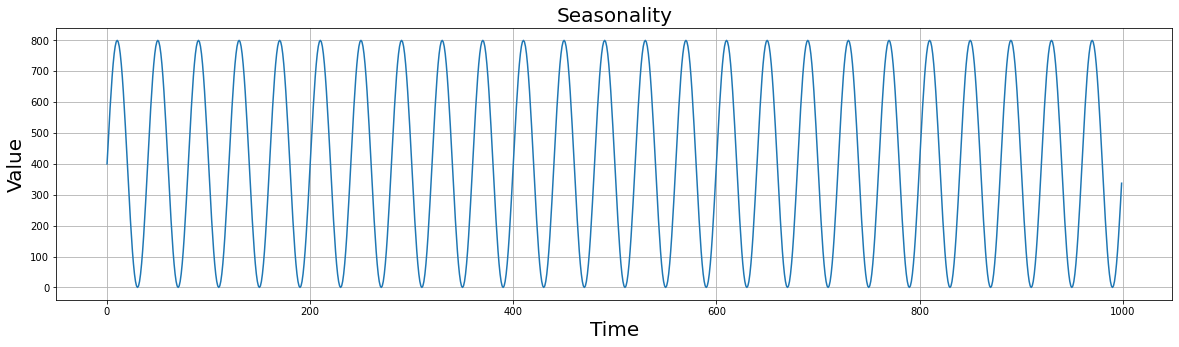

In [3]:
# Just a random pattern
values = [np.sin(x / 40 * 2 * np.pi) for x in range(40)]
# Repeat the pattern 5 times
seasonal = []
for i in range(25):
    for j in range(40):
        seasonal.append(values[j])
seasonal = (np.array(seasonal) + 1) * 400 

# Plot
time_seasonal = np.arange(1000)
plot_time_series(time_seasonal, seasonal, label="Seasonality")

In [11]:
# noise = np.random.randn(250)*100
# seasonal += noise
# time_seasonal = np.arange(250)
# plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")

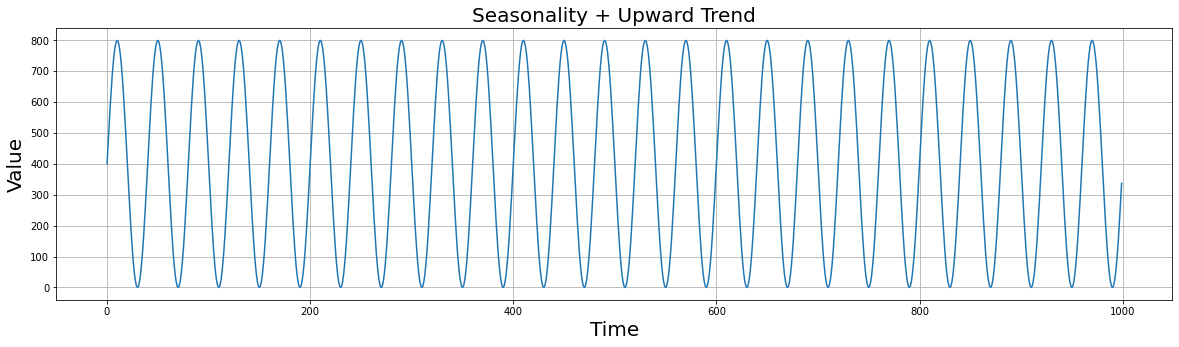

In [4]:
seasonal_upward = seasonal  # + np.arange(1000) * 0.2
time_seasonal = np.arange(1000)
# seasonal_upward = seasonal_upward / 500
plot_time_series(time_seasonal, seasonal_upward, label="Seasonality + Upward Trend")

In [60]:
np.save('./sin/without_holiday', seasonal_upward)

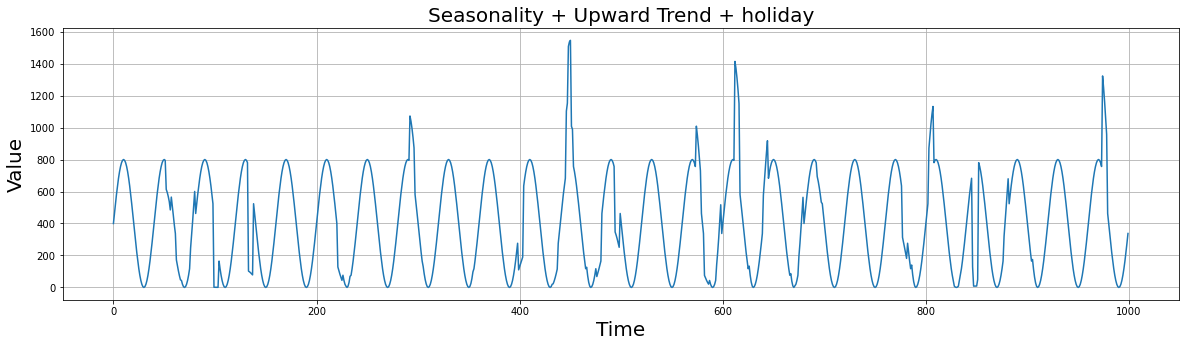

In [20]:
holiday_factor = np.random.rand(40) * 2.0
holiday = np.random.choice(1000, 40)
seasonal_upward_holiday = seasonal_upward.copy()
for h, hf in zip(holiday, holiday_factor):
    seasonal_upward_holiday[h + 1: h + 6] = seasonal_upward_holiday[h + 1: h + 6] * hf

plot_time_series(time_seasonal, seasonal_upward_holiday, label="Seasonality + Upward Trend + holiday")

In [21]:
holi = np.ones_like(seasonal_upward_holiday)
holi[holiday] = 0#holiday_factor
# np.save('./holiday', holi)
np.stack((seasonal_upward_holiday, holi), axis=1).shape

(1000, 2)

In [22]:
np.save('./sin_mul_6/with_holiday', np.stack((seasonal_upward_holiday / 800, holi), axis=1))

In [18]:
holi[np.abs(holi - 1) > 1e-5].shape

(39,)